#**IDH Prediction with Pure Numpy**

##***Lenik Rafael Vazquez***

This Notebook shows how using mathematics without using prefabricated neural networks it is possible to build neural networks capable of making effective predictions, with a single layer neural network.

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In the first step, the pandas, pyplot and numpy libraries are imported, which allow us to handle the data in the form of datasets and matrices while allowing us to represent them as graphics

In [265]:
input = pd.read_csv("Lifelevelsparameters.csv", encoding= "latin-1")

input.head()

,Country,IEF,Gini,GII,Biocapacity-Footprint,HCI,HDI
0,Norway,73.4,27.0,0.044,1.8,0.8,0.954
1,Switzerland,82.0,32.7,0.037,-3.6,0.8,0.946
2,Ireland,80.9,32.8,0.093,-1.7,0.8,0.942
3,Germany,73.5,31.9,0.084,-3.2,0.8,0.939
4,Australia,82.6,34.4,0.103,5.7,0.8,0.938


The Dataset containing the data to be evaluated is imported and a little exploratory analysis is carried out with the "head" function.

In [266]:
target = input.iloc[:, 6:7]

input = input.iloc[:, 1:6]

In [267]:
input = input.to_numpy()

target = target.to_numpy()

Then the dataset is divided into the input values ​​and the output values ​​at the same time that they go from being pandas dataframes to numpy arrays

In [268]:
input = (input - input.min())/ (input.max() - input.min())

The dataset is scaled to keep the data in a range from 0 to, using a scaling function that works by dividing over the highest number, which becomes one and all the smallest numbers go to a range from 0 to 1

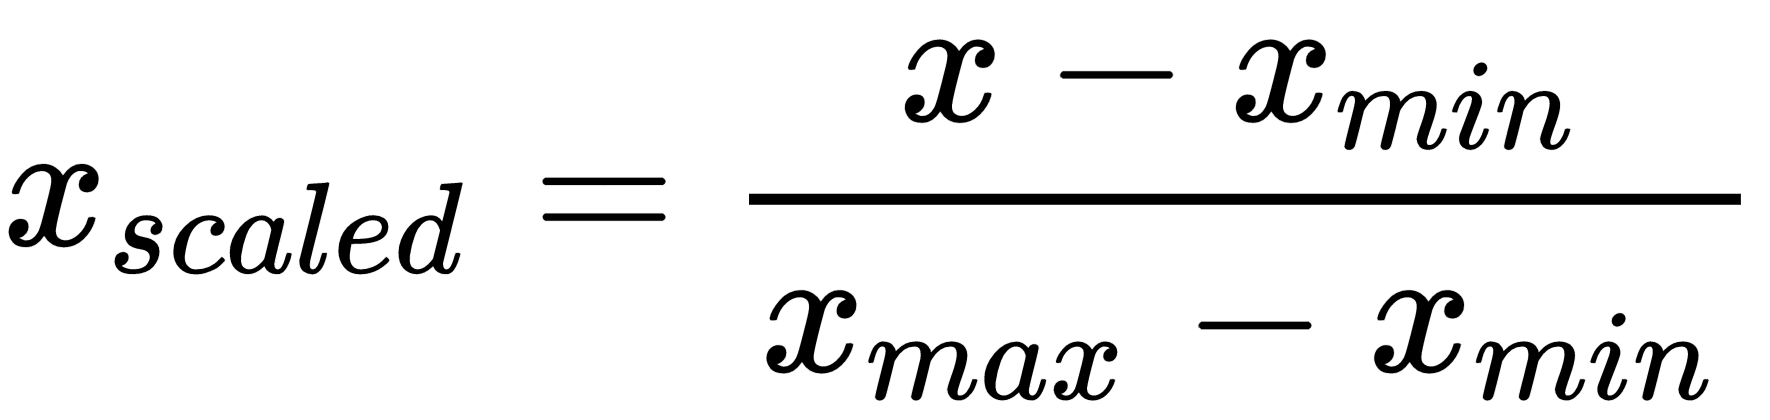

#**Defining Functions**

As activation function, the sigmoid function is selected that maintains the values ​​in a range from 0 to 1

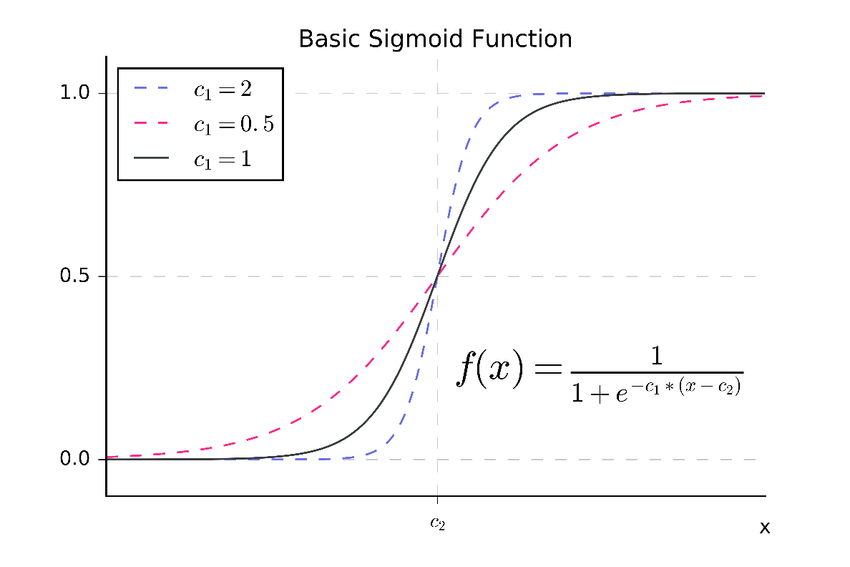

In [269]:
def sigmoid(X):

  val = 1/(1+np.exp(-X))
  
  return val

The weights are defined, as a vector of random values ​​of the size of each row of the input matrix

In [270]:
weights = np.random.rand(5,1)

The bias values ​​and the learning rate of the network are described.

In [271]:
bias = 0.25

lr = 0.05

Finally the derived function of sigmoid is defined

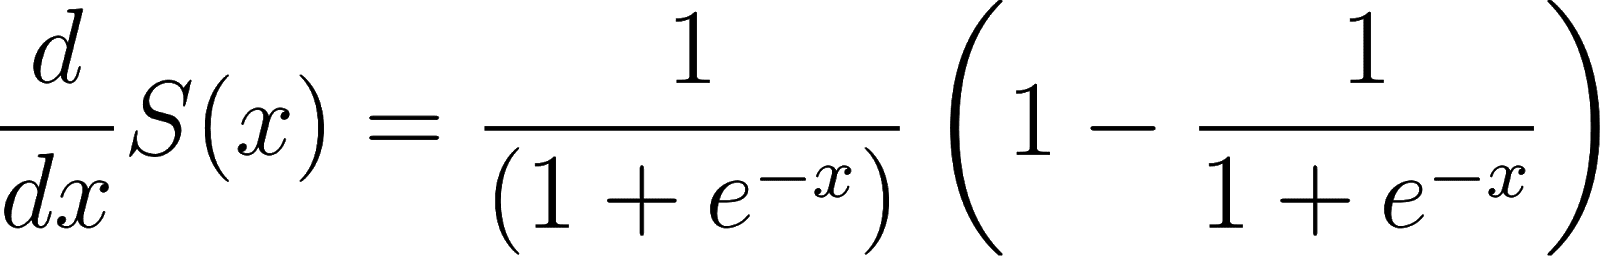

In [272]:
def sigmoid_der(x):

  return sigmoid(x)*(1-sigmoid(x))

#**Neural Network**

The Neural Network Works by making the dot product between the input matrix and the weights.

Once done, it goes through a sigmoid function that gives a result, which is our first prediction.

This prediction is subtracted from the expected value to get the error.

After that, the propagation backwards is carried out, where the result of the cost function is subtracted from the value of the weights by the learning rate.

Once we repeat the process multiple times we obtain increasingly precise weights

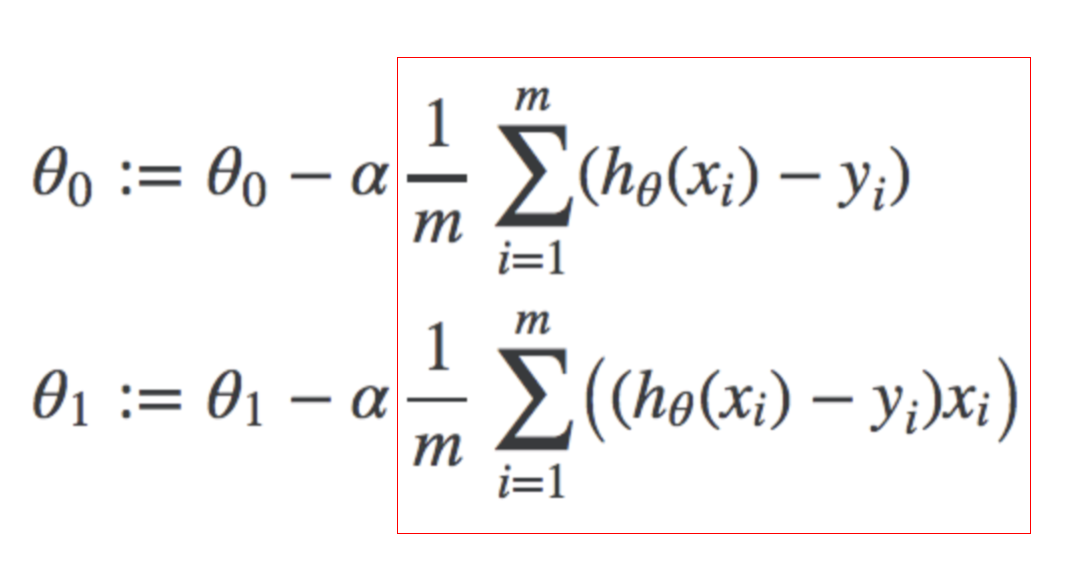

In [273]:
for epoch in range(10000):

  inputs = input

  #Forward Propagation

  in_o = np.dot(inputs, weights) + bias

  out_o = sigmoid(in_o)

  #Backward Propagation

  #Error

  error = (out_o - target)

  x = error.sum()

  #Calculating Derivative

  derror_outo = error
  derror_dino = sigmoid_der(out_o)

  deriv = derror_outo * derror_dino

  inputs = input.T 

  deriv_final = np.dot(inputs, deriv)

  weights -= lr*deriv_final

  for i in deriv:

    bias -= lr*i

#**Predict**

Now that we are done we can start to predict, repeating the forward propagation process, but with the weights now well specified

In [275]:
weights

array([[ 5.95817721],
       [-2.62631107],
       [-0.25544164],
       [ 0.29418897],
       [ 0.87169737]])

In [ ]:
result1 = np.dot(input, weights) + bias


In [282]:
predicted_set = sigmoid(result1)

We can then proceed to compare our predictions

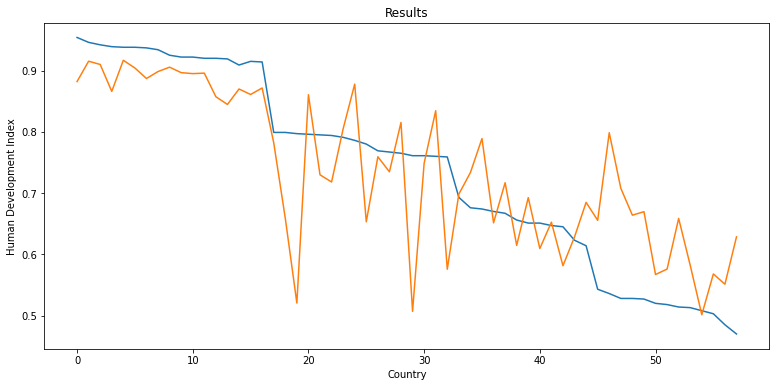

<Figure size 432x288 with 0 Axes>

In [284]:
plt.figure(figsize=(13,6))
plt.plot(target)
plt.plot(predicted_set)
plt.title('Results')
plt.ylabel('Human Development Index')
plt.xlabel('Country')
plt.show()
plt.savefig('Results.jpg')

Let's see then the mean error of our prediction

In [289]:
error = np.mean(predicted_set - target)

print(error)

8.335879913064752e-05
